In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.diagnostic import kstest_normal
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import binom_test
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.proportion import binom_test, proportions_ztest, proportions_chisquare
from statsmodels.distributions.empirical_distribution import ECDF

### Консервативность

Проверим консервативность критериев, сгенерировав много выборок из нормального распределения.

In [15]:
Ks = []
Jb = []
Sh = []
n = 200
for i in range(10000):
    X = np.random.randn(n)
    Ks.append(kstest_normal(X, dist='norm', pvalmethod='approx')[1])
    Jb.append(st.jarque_bera(X)[1])
    Sh.append(st.shapiro(X)[1])

In [24]:
len(Ks)

10000

Критерий Лилиефорса

In [25]:
len([k for k in Ks if k > 0.05]) / len(Ks)

0.9446

Критерий Харке-Бера

In [26]:
len([k for k in Jb if k > 0.05]) / len(Jb)

0.9538

Критерий Шапиро-Уилка

In [27]:
len([k for k in Sh if k > 0.05]) / len(Sh)

0.9464

In [28]:
Ks = []
Jb = []
Sh = []
n = 20
for i in range(10000):
    X = np.random.randn(n)
    Ks.append(kstest_normal(X, dist='norm', pvalmethod='approx')[1])
    Jb.append(st.jarque_bera(X)[1])
    Sh.append(st.shapiro(X)[1])

Лилиефорс

In [29]:
len([k for k in Ks if k > 0.05]) / len(Ks)

0.948

Харке-Бера

In [31]:
len([k for k in Jb if k > 0.05]) / len(Jb)

0.9744

Шапиро-Уилка

In [32]:
len([k for k in Sh if k > 0.05]) / len(Sh)

0.9476

Видим, что доля верно опознанных распределений из нормальных близка к 95%. То есть, критерии консервативны с хорошей точностью.

## Мощность

А теперь исследуем их на мощность

### Выборка из распределения Лапласа

Распределение Лапласа

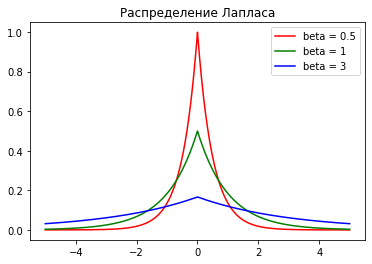

In [84]:
def laplace_function(x,beta):
    result = (1/(2*beta)) * np.e**(-1*(np.abs(x)/beta))
    return result

x = np.linspace(-5,5,10000)
y1 = [laplace_function(x_,0.5) for x_ in x]
y2 = [laplace_function(x_,1) for x_ in x]
y3 = [laplace_function(x_,3) for x_ in x]
 
 
plt.plot(x,y1,color='r',label='beta = 0.5')
plt.plot(x,y2,color='g',label='beta = 1')
plt.plot(x,y3,color='b',label='beta = 3')
plt.title("Распределение Лапласа")
plt.legend()
plt.show()

**Теперь вычислим мощность критериев**

In [40]:
Ks = []
Jb = []
Sh = []
n = 20
for i in range(10000):
    X = st.laplace.rvs(size = n)
    Ks.append(kstest_normal(X, dist='norm', pvalmethod='approx')[1])
    Jb.append(st.jarque_bera(X)[1])
    Sh.append(st.shapiro(X)[1])

Лилиефорс

In [41]:
len([k for k in Ks if k < 0.05]) / len(Ks)

0.2155

Харке-Бера

In [42]:
len([k for k in Jb if k < 0.05]) / len(Jb)

0.2197

Шапиро-Уилка

In [43]:
len([k for k in Sh if k < 0.05]) / len(Sh)

0.2629

In [44]:
Ks = []
Jb = []
Sh = []
n = 200
for i in range(10000):
    X = st.laplace.rvs(size = n)
    Ks.append(kstest_normal(X, dist='norm', pvalmethod='approx')[1])
    Jb.append(st.jarque_bera(X)[1])
    Sh.append(st.shapiro(X)[1])

Лилиефорс

In [48]:
len([k for k in Ks if k < 0.05]) / len(Ks)

0.9443

Харке-Бера

In [46]:
len([k for k in Jb if k < 0.05]) / len(Jb)

0.9631

Шапиро-Уилка

In [47]:
len([k for k in Sh if k < 0.05]) / len(Sh)

0.9748

На распределении Лапласа критерий Шапиро-Уилка показал мощность чуть больше, чем остальные

### Выборка из распределения Стьюдента

In [51]:
k = 5 # Число степеней свободы
Ks = []
Jb = []
Sh = []
n = 20
for i in range(10000):
    X = st.t.rvs(k, size=n)
    Ks.append(kstest_normal(X, dist='norm', pvalmethod='approx')[1])
    Jb.append(st.jarque_bera(X)[1])
    Sh.append(st.shapiro(X)[1])

Лилиефорса

In [53]:
len([k for k in Ks if k < 0.05]) / len(Ks)

0.1243

Харке-Бера

In [52]:
len([k for k in Jb if k < 0.05]) / len(Jb)

0.1558

Шапиро-Уилка

In [54]:
len([k for k in Sh if k < 0.05]) / len(Sh)

0.1773

In [55]:
k = 5 # Число степеней свободы
Ks = []
Jb = []
Sh = []
n = 200
for i in range(10000):
    X = st.t.rvs(k, size=n)
    Ks.append(kstest_normal(X, dist='norm', pvalmethod='approx')[1])
    Jb.append(st.jarque_bera(X)[1])
    Sh.append(st.shapiro(X)[1])

Лилиефорс

In [56]:
len([k for k in Ks if k < 0.05]) / len(Ks)

0.5388

Харке-Бера

In [58]:
len([k for k in Jb if k < 0.05]) / len(Jb)

0.8623

Шапиро-Уилка

In [57]:
len([k for k in Sh if k < 0.05]) / len(Sh)

0.8162

Здесь критерий Лилиефорса показал себя менее мощным.

### Усечённое нормальное

In [59]:
Ks = []
Jb = []
Sh = []
n = 200
for i in range(10000):
    X = st.truncnorm(a=-2/3., b=2/3., scale=3).rvs(size=n)
    Ks.append(kstest_normal(X, dist='norm', pvalmethod='approx')[1])
    Jb.append(st.jarque_bera(X)[1])
    Sh.append(st.shapiro(X)[1])

Лилиефорс

In [60]:
len([k for k in Ks if k < 0.05]) / len(Sh)

0.867

Харке-Бера

In [61]:
len([k for k in Jb if k < 0.05]) / len(Sh)

0.9991

Шапиро-Уилка

In [62]:
len([k for k in Sh if k < 0.05]) / len(Sh)

1.0